##### Libraries and GPU

In [10]:
                                    ########### VISUALIZATION TOOLS ###########

%matplotlib inline
import matplotlib.pyplot as plt                  # basic plotting
import matplotlib.ticker as mtick                 # axis tick formatting
from matplotlib import colormaps as cm            # colormaps
import matplotlib.patches as mpatches             # patch shapes
from matplotlib.patches import Patch              # patch base class

import seaborn as sns                             # statistical data visualization
import warnings                                   # warning control
warnings.filterwarnings("ignore", category=UserWarning)  # ignore seaborn UserWarnings

import plotly.express as px                       # interactive plots (express interface)
import plotly.graph_objects as go                  # interactive plots (graph objects)

import folium                                    # interactive maps
from folium import plugins                        # folium plugins
from folium import Choropleth                      # choropleth maps

from IPython.display import display, IFrame, HTML  # display rich content in notebooks
from IPython import display as ipythondisplay

from tqdm.notebook import tqdm                    # progress bars for notebook loops

import wordcloud                                 # word cloud visualization
from wordcloud import WordCloud, STOPWORDS        # word cloud generator and stopwords

                                    ########### VECTORS AND MATRICES ###########

import numpy as np                               # numerical arrays and matrix operations
import pandas as pd                              # data manipulation and analysis

                                    ########### SCIPY ###########

from scipy import stats                           # statistical functions

                                    ########### SCIKIT-LEARN ###########

from sklearn.preprocessing import (
    StandardScaler,      # z-score normalization
    normalize,           # row-wise normalization
    PolynomialFeatures,  # polynomial regression features
    OneHotEncoder,       # one-hot encoding categorical features
    LabelEncoder,        # label encoding for target
    label_binarize       # multi-label one-hot encoding
)

from sklearn.linear_model import (
    LinearRegression,    # ordinary least squares regression
    Ridge,               # ridge regression (L2 regularization)
    Lasso,               # lasso regression (L1 regularization)
    LogisticRegression   # logistic regression for classification
)

from sklearn.tree import (
    DecisionTreeClassifier,  # classification trees
    DecisionTreeRegressor,   # regression trees
    plot_tree                # visualize decision trees
)

from sklearn.svm import (
    LinearSVC,  # linear support vector classifier
    SVC         # kernelized SVM classifier
)

from sklearn.neighbors import KNeighborsClassifier  # k-nearest neighbors

from sklearn.cluster import KMeans               # k-means clustering

from sklearn.ensemble import (
    RandomForestRegressor,    # ensemble regression method
    RandomForestClassifier    # ensemble classification method
)

from sklearn.metrics import (
    mean_squared_error,      # MSE regression metric
    r2_score,               # R-squared metric
    log_loss,               # cross-entropy loss
    mean_absolute_error,    # MAE metric
    root_mean_squared_error,# RMSE metric
    confusion_matrix,       # confusion matrix
    ConfusionMatrixDisplay, # plot confusion matrix
    accuracy_score,         # classification accuracy
    roc_auc_score,          # ROC AUC metric
    classification_report,  # detailed classification metrics report
    silhouette_score, silhouette_samples, davies_bouldin_score,  # clustering quality metrics
    explained_variance_score # explained variance regression metric
)

from sklearn.pipeline import Pipeline           # pipeline for chaining transforms and estimators

from sklearn.model_selection import (
    train_test_split,       # split data into train/test sets
    cross_val_score,        # k-fold cross-validation scores
    cross_val_predict,      # k-fold cross-validation predictions
    StratifiedKFold,        # stratified k-fold cross-validation
    GridSearchCV            # grid search hyperparameter tuning
)

from sklearn.multiclass import OneVsOneClassifier  # multiclass classification using binary classifiers

from sklearn.utils.class_weight import compute_sample_weight  # compute sample weights for imbalanced data

from sklearn.decomposition import PCA              # principal component analysis

from sklearn.compose import ColumnTransformer       # apply different transformations to columns

from sklearn.impute import SimpleImputer             # missing value imputation

#from umap.umap_ import UMAP                          # UMAP dimensionality reduction (commented out)

from sklearn.manifold import TSNE                     # t-SNE dimensionality reduction

from sklearn.datasets import (
    make_blobs,              # synthetic cluster dataset generator
    make_classification,     # synthetic classification dataset generator
    load_diabetes,           # diabetes dataset
    load_breast_cancer,      # breast cancer dataset
    load_iris,               # iris dataset
    fetch_california_housing # california housing dataset
)
diabetes = load_diabetes()
cancers = load_breast_cancer()
iris = load_iris()
cal_housing = fetch_california_housing()

                                    ########### ENSEMBLE METHODS ###########

from xgboost import XGBRegressor                   # extreme gradient boosting regressor

                                    ########### PYTORCH ###########

import torch                                        # core PyTorch
from torch import nn                               # neural network modules
from torch import optim                            # optimizers
import torch.nn.functional as functional           # functional interface for NN ops
from torch.utils.data import Dataset, DataLoader, random_split  # data utilities
from torchvision.utils import make_grid             # visualize image grids
import torchvision                                  # computer vision models and datasets
import torchvision.transforms as transforms         # image transforms pipeline
from torchvision import datasets                     # image datasets
from torch.utils.data import Subset                  # subset of datasets
import torchvision.models as models                  # pretrained models

import albumentations as albuments                   # advanced data augmentation

from torchsummary import summary                     # model summary

import timm                                         # PyTorch Image Models (SOTA model zoo)

                                    ########### IMAGES ###########

import os                                           # filesystem operations
from PIL import Image, ImageFile                     # image loading and processing

import copy                                # shallow copy
import operator                                     # functional tools for operators
import sys                                          # system-specific parameters and functions

import cv2                                          # OpenCV for image processing

                                    ########### SCRAPING ###########

import urllib                                        # URL handling
import requests                                     # HTTP requests
import io                                           # streams and bytes IO
from io import StringIO                             # string stream for IO

from bs4 import BeautifulSoup                        # HTML/XML parsing

import json                                         # JSON parsing
import xml.etree.ElementTree as ET                   # XML parsing

                                    ########### MISC ###########
                                    
import gymnasium                                    # reinforcement learning environments
from gymnasium.wrappers import RecordVideo          # video recording wrapper for gymnasium envs

import glob                                         # Unix style pathname pattern expansion
import base64                                       # base64 encoding/decoding

import random                                       # random number generators
import time                                         # time-related functions
import datetime                                     # date and time functions

import re                                           # regular expressions
import unicodedata                                  # Unicode character database

import shutil                                       # high-level file operations
from pathlib import Path                            # filesystem path manipulations

from collections import namedtuple, deque          # advanced data structures


In [11]:
def accelerator(where = "mps"):
    if where == "mps":
        device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
        print("Which device we are on: {}".format(device))
        return device
    if where == "cuda":
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print("Which device we are on: {}".format(device))
        return device
    if where == "cpu":
        device = torch.device("cpu")
        print("Which device we are on: {}".format(device))
        return device

device = accelerator("cpu")

Which device we are on: cpu


# Download the animal-dataset from Kaggle to local

In [12]:
# !pip install kaggle

In [13]:
# import shutil

# #create an hidden directory .kaggle (which is fundamental for using the library kaggle), then move the kaggle.json from the
# #folder I created (KAGGLE) to the standard .kaggle
# os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok = True)
# kaggle_json_path = os.path.expanduser('~/Desktop/programmazione/KAGGLE/kaggle.json') 
# shutil.copy(kaggle_json_path, os.path.expanduser('~/.kaggle/kaggle.json'))
# os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600) #set the correct premission

# #download and unzip the dataset we want
# !kaggle datasets download ikjotsingh221/animal-dataset --force
# !unzip -o animal-dataset.zip -d animal_dataset #the unzipped content is saved in the directory animal_dataset

In [14]:
def is_not_truncated(file_path):
    try:
        with Image.open(file_path) as img:
            img.load()
            return True
    except OSError:
        return False
    
def image_checker(folder_path):
    corrupted = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                path = os.path.join(root, file)
                if not is_not_truncated(path):
                    corrupted.append(path)

    if corrupted:
        print("List of corrupted images:")
        for path in corrupted:
            print(path)
    else:
        print("✅✅✅✅ No corrupted images found ✅✅✅✅")

ImageFile.LOAD_TRUNCATED_IMAGES = False  # Raise error on truncated images
image_checker('animal_dataset')

✅✅✅✅ No corrupted images found ✅✅✅✅


First we look the subfolders, to see the structure:

In [15]:
for root, dirs, files in os.walk('animal_dataset'): print(root)

animal_dataset
animal_dataset/dataset
animal_dataset/dataset/Training
animal_dataset/dataset/Training/crows
animal_dataset/dataset/Training/rats
animal_dataset/dataset/Training/bears
animal_dataset/dataset/Training/elephants
animal_dataset/dataset/Testing
animal_dataset/dataset/Testing/crows
animal_dataset/dataset/Testing/rats
animal_dataset/dataset/Testing/bears
animal_dataset/dataset/Testing/elephants
animal_dataset/.checkpoints


# Useful Functions

In [1]:
# show a single image, in original color and rgb

def show_image(index, dataset, devs = 1, means = 0, size = (8,6)):
    fig, axes = plt.subplots(1, 4, figsize = size)  
    
    img_tensor, label_tensor = dataset[index]  # img_tensor: [C = 3, H, W]
    
    img = img_tensor.swapaxes(0, 1).swapaxes(1, 2)  # img: From [C = 3, H, W] to [H, W, C = 3] 
    img = img * torch.tensor(devs) + torch.tensor(means)

    r = copy.deepcopy(img)
    r[:, :, 1] = r[:, :, 2] = 0

    g = copy.deepcopy(img)
    g[:, :, 0] = g[:, :, 2] = 0

    b = copy.deepcopy(img)
    b[:, :, 0] = b[:, :, 1] = 0

    images = [img, r, g, b]
    titles = ["Original", "Red", "Green", "Blue"]

    for ax, im, title in zip(axes, images, titles):
        ax.imshow(im)
        ax.set_title(title)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
    plt.close()

In [2]:
# accuracy function, loader-per-loader

def accuracy_on_loader(model, loader):
    correct = 0.0
    total = 0
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            out_vector = model(x) # Shape: (BATCH_SIZE, number_of_classes)
            y_hat = torch.argmax(out_vector, dim = 1) # Predicted class index
            correct += (y_hat == y).sum().item()
            total += y.size(0) # this is needed if we drop the last batch!

    accuracy = correct / total * 100
    return accuracy

This code is taken from https://github.com/Bjarten/early-stopping-pytorch.

In this EarlyStopping class, the code checks that a particular metric is non deteriorating too much (so this class works very well only for metrics that we want to **minimize**, as a loss, but not for an accuracy for example!). When everything is going in the right direction, we save the parameters of the model (`model.state_dict()`) as checkpoints in a particular path by using `torch.save(model.state_dict(), self.path)`. In particular `torch.save(obj, f)` is a function in PyTorch used to serialize and save an objectì (obj) to a file (f) using Python's pickle serialization. When obj is a model's state dictionary (`model.state_dict()`), `torch.save()` serializes the dictionary and saves it to the specified file path (f).

In [3]:
class EarlyStopping:
  def __init__(self, patience = 5, delta = 0, verbose = False, path = 'checkpoint.pt'):
    self.patience = patience       # Number of epochs to wait for improvement: after 'patient number of epochs' without improvement, training will stop
    self.delta = delta             # Minimum change in monitored metric to qualify as improvement: if the validation metric does not improve by at least 'delta', it is not considered an improvement
    self.verbose = verbose         # If True, print a message when validation metric improves
    self.path = path               # Path to save the model checkpoint
    self.counter = 0               # Counter to track epochs without improvement
    self.best_score = None         # Best validation metric achieved so far
    self.early_stop = False        # Flag to indicate whether to stop training

  def save_checkpoint(self, model):
    os.makedirs(os.path.dirname(self.path), exist_ok = True)  # <-- create the directory if it does not exist
    torch.save(model.state_dict(), self.path)

  def __call__(self, val_metric, model):
    if self.best_score is None: 
      self.best_score = val_metric
      self.save_checkpoint(model)

    elif val_metric > self.best_score + self.delta:
      self.counter += 1
      if self.verbose:
        print(f'Epochs without improvement: {self.counter}')
      if self.counter >= self.patience:
                self.early_stop = True
    else:
      self.best_score = val_metric
      self.save_checkpoint(model)
      self.counter = 0

  

In [4]:
# train function

def train_function(train_loader, test_loader, model, loss_function, optimizer, path, early_stopping = None, epochs = 1):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []
    for epoch in tqdm(range(epochs)):
        model.train()
        train_loss = 0.0
        for x_train, y_train in train_loader: #for each epoch, we do the backpropagation etc for each batch
            x_train = x_train.to(device)  # Move input to the device
            y_train = y_train.to(device)  # Move target to the device
            y_hat_train = model(x_train) # the model returns a tensor of shape (batch_size,1), we squeeze it to have a tensor of shape (batch_size,)
            loss = loss_function(y_hat_train, y_train)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        train_acc = accuracy_on_loader(model, train_loader)
        train_accuracies.append(train_acc)
        
        model.eval()
        with torch.no_grad():
            test_loss = 0.0 
            for x_test, y_test in test_loader: 
                x_test = x_test.to(device)  # Move input to the device
                y_test = y_test.to(device)  
                y_hat_test = model(x_test) 
                loss = loss_function(y_hat_test, y_test)
                test_loss += loss.item()
        
        test_loss /= len(train_loader)
        test_losses.append(test_loss)
        test_acc = accuracy_on_loader(model, test_loader)
        test_accuracies.append(test_acc)

        print("-"*160)
        print(f"\t\t\t\t\t\t\t\t\t AT EPOCH {epoch+1}")
        print(f"Train accuracy: {np.round(float(train_acc),3)}% --------------  Test accuracy: {np.round(float(test_acc),3)}%.")
        print(f"Train loss: {np.round(train_loss,3)} --------------  Test loss: {np.round(test_loss,3)}.")

        if early_stopping is not None:
            early_stopping(test_loss, model)  
            if early_stopping.early_stop == True:
                print("Early stopping triggered.")
                break
        
        torch.save(model.state_dict(), path)
    
    
    return train_losses, train_accuracies, test_losses, test_accuracies


In [5]:
# plotting the effect of early stopping, if there is; otherwise do not plot anything.
# The arguments are the output of `train_function` and early_stopping

def early_stop_plot(train_losses, train_accuracies, test_losses, test_accuracies, early_stopping):
    if early_stopping.early_stop == True:
        fig, ax = plt.subplots(nrows=2, ncols=1, sharex = True)
        ax[0].plot(train_losses, label = "Train")
        ax[0].plot(test_losses, label = "Test")
        ymin, ymax = ax[0].get_ylim()
        ax[0].set_ylim(ymin, ymax)
        ax[0].vlines(np.argmin(test_losses), ymin=ymin, ymax=ymax, color = 'black', linestyle = '--')
        ax[0].text(x = np.argmin(test_losses) - 2, y = (ymax+ymin)/2 + 0.3, s = "Early stopping")
        ax[0].legend()
        ax[0].set_ylabel("Cross entropy")
        ax[1].plot(train_accuracies, label = "Train")
        ax[1].plot(test_accuracies, label = "Test")
        ymin, ymax = ax[1].get_ylim()
        ax[1].set_ylim(ymin, ymax)
        ax[1].vlines(np.argmin(test_accuracies), ymin=ymin, ymax=ymax, color = 'black', linestyle = '--', )
        ax[1].set_xlabel("Epochs")
        ax[1].set_ylabel("Accuracy (%)")
        plt.show()
        plt.close()

    if early_stopping.early_stop == False:
        print("Early stopping not triggered, plot not showed.")
    

In [6]:
# plotting a summary of the results of training; the arguments are the output of `train_function` and the number of epochs

def training_results(train_losses, train_accuracies, test_losses, test_accuracies, epochs):
    plt.figure(figsize=(10, 6))

    # left
    ax1 = plt.gca()
    ax1.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='tab:blue', linestyle='-')
    ax1.plot(range(1, epochs + 1), test_losses, label='Test Loss', color='tab:red', linestyle='-')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')

    # right
    ax2 = ax1.twinx()
    ax2.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy', color='tab:blue', linestyle='dashdot')
    ax2.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy', color='tab:red', linestyle='dashdot')
    ax2.set_ylabel('Accuracies')
    ax2.tick_params(axis='y')
    ax2.legend(loc='lower right')

    plt.title('Training and Test, Loss & Accuracy')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()

In [7]:
# generate confusion matrices and classification_report for train and test

def classification_reports(train_loader, test_loader, model, labels, classes, size = (10, 4)):
    model.eval()
    all_y_train = []
    all_y_hat_train = []
    all_y_test = []
    all_y_hat_test = []

    with torch.no_grad():
        for x_train, y_train in train_loader:
            x_train = x_train.to(device)
            y_train = y_train.to(device)
            out_vector_train = model(x_train) # Shape: (BATCH_SIZE, number_of_classes)
            y_hat_train = torch.argmax(out_vector_train, dim = 1) # Predicted class index
            all_y_train.extend(y_train.cpu().numpy())
            all_y_hat_train.extend(y_hat_train.cpu().numpy())

        for x_test, y_test in test_loader:
            x_test = x_test.to(device)
            y_test = y_test.to(device)
            out_vector_test = model(x_test) # Shape: (BATCH_SIZE, number_of_classes)
            y_hat_test = torch.argmax(out_vector_test, dim = 1) # Predicted class index
            all_y_test.extend(y_test.cpu().numpy())
            all_y_hat_test.extend(y_hat_test.cpu().numpy())

    cm_train = confusion_matrix(all_y_train, all_y_hat_train)
    cm_test = confusion_matrix(all_y_test, all_y_hat_test)
    report_train = classification_report(
        all_y_train,
        all_y_hat_train,
        labels = labels,
        target_names = classes,
        output_dict = True #to produce a dict
    )

    report_test = classification_report(
        all_y_test,
        all_y_hat_test,
        labels = labels,
        target_names = classes,
        output_dict = True
    )

    # Convert to DataFrames
    df_train = pd.DataFrame(report_train).transpose().round(2)
    df_test = pd.DataFrame(report_test).transpose().round(2)

    # Plot side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 2))

    for ax, df, title in zip(axes, [df_train, df_test], ['Training Set', 'Test Set']):
        ax.axis('off')
        table = ax.table(cellText = df.values,
                        rowLabels = df.index,
                        colLabels = df.columns,
                        cellLoc = 'center',
                        loc = 'center')
        ax.set_title(f'Classification Report - {title}', fontsize=14)

    plt.tight_layout()
    plt.show()
    plt.close()

    # Create a subplot with 1 row and 2 columns
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = size)

    # Plot training confusion matrix
    disp_train = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = classes)
    disp_train.plot(ax = axes[0], cmap = plt.cm.Blues, colorbar = True)
    axes[0].set_title('Confusion matrix - Training Set')

    # Plot test confusion matrix
    disp_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = classes)
    disp_test.plot(ax = axes[1], cmap = plt.cm.Reds, colorbar = True)
    axes[1].set_title('Confusion matrix - Test Set')

    plt.tight_layout()
    plt.show()
    plt.close()

# Dataset exploration: from local to PyTorch

Hyperparameters:

In [16]:
RESIZE_DIM = 256
IMAGENET_MEANS = [0.485, 0.456, 0.406]
IMAGENET_STDS = [0.229, 0.224, 0.225]
BATCH_SIZE = 32

Now we load to Torch tensors, using some standard normalization on the three channels (the images are not black-white); also, we resize the original images to 32x32, to improve training duration:

In [17]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((RESIZE_DIM, RESIZE_DIM)),  # Resize images from 224x224 pixels to 'nxn' pixels
    torchvision.transforms.ToTensor(),           # Convert images to PyTorch tensors
    torchvision.transforms.Normalize(mean = IMAGENET_MEANS, 
                                     std = IMAGENET_STDS)  # Normalize pixel values with the standard for imagenet
])

train_dataset = torchvision.datasets.ImageFolder('animal_dataset/dataset/Training',
                                                transform = transform,
                                                is_valid_file = is_not_truncated)

test_dataset = torchvision.datasets.ImageFolder('animal_dataset/dataset/Testing', 
                                               transform = transform, 
                                               is_valid_file = is_not_truncated)

Dataset info:

----------------------------------------------------------------------------------------------------------------------------------------------------------------
								 DATA DISTRIBUTION:

bear        395
crow        231
elephant    367
rat         245
Name: count, dtype: int64

Class balancing:
bear (31.91%)
crow (18.66%)
elephant (29.64%)
rat (19.79%)


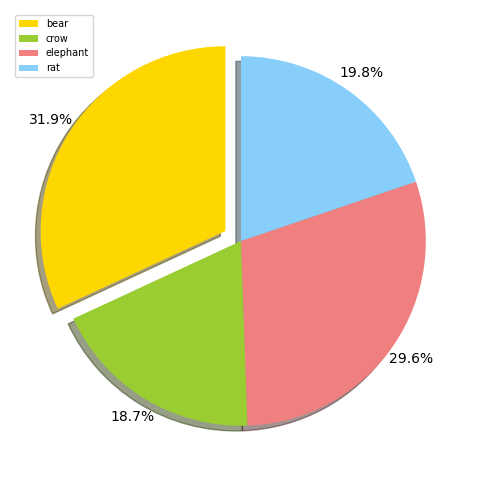


The labels are [0, 1, 2, 3], corresponding to {0: 'bear', 1: 'crow', 2: 'elephant', 3: 'rat'}

Dimension of images: 256x256, that is 65536 features.
----------------------------------------------------------------------------------------------------------------------------------------------------------------
								 TRAIN:

Number of images: 1238.
----------------------------------------------------------------------------------------------------------------------------------------------------------------
								 TEST:

Number of images: 326.


In [40]:
labels_list = []
for X_train,y_train in train_dataset:
    labels_list.append(y_train)

labels = set(labels_list)
labels = pd.Series(labels_list).unique().tolist()
label_names = {0 : "bear", 1 : "crow", 2 : "elephant", 3 : "rat"}
classes = ["bear", "crow", "elephant", "rat"]

labels_list = pd.DataFrame(labels_list, columns = ['label'])
labels_distribution = labels_list['label'].value_counts().sort_index()
labels_distribution.index = [label_names[0], label_names[1], label_names[2], label_names[3]]
labels_distribution.columns = ['label']

print("-"*160)
print(f"\t\t\t\t\t\t\t\t DATA DISTRIBUTION:\n")
print(f"{labels_distribution}\n")

print(f"Class balancing:")
percentage = {}
for i in range(len(label_names)):
       print(f"{label_names[i]} ({np.round(labels_distribution[label_names[i]]/len(train_dataset)*100,2)}%)")
       percentage[label_names[i]] = labels_distribution[label_names[i]]/len(train_dataset)*100

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
in_evidence_list = [0.1, 0, 0, 0]
pd.Series(percentage).plot(kind = 'pie',
                figsize = (6, 6),
                autopct = '%1.1f%%', 
                startangle = 90,    
                shadow = True,       
                labels = None,         # turn off labels on pie chart
                pctdistance = 1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                colors = colors_list,  # add custom colors
                explode = in_evidence_list # 'explode' 3 continents
                )
plt.legend(labels=classes, loc='upper left', fontsize=7) 
plt.show()
plt.close()
  
print(f"\nThe labels are {labels}, corresponding to {label_names}\n")

image_8 = train_dataset[8][0] # shape : torch.Size([3, 256, 256]) = torch.Size([colours, RESIZE_DIM, RESIZE_DIM])
number_of_channels = image_8.shape[0]

label_8 = train_dataset[8][1]
label_8 = torch.tensor(label_8, dtype = torch.int64).unsqueeze(0) # shape: torch.Size([1])
print(f"Dimension of images: {image_8.shape[1]}x{image_8.shape[1]}, that is {image_8.shape[1]*image_8.shape[1]} features.")

print("-"*160)
print(f"\t\t\t\t\t\t\t\t TRAIN:\n")
print(f"Number of images: {len(train_dataset)}.")
print("-"*160)
print(f"\t\t\t\t\t\t\t\t TEST:\n")
print(f"Number of images: {len(test_dataset)}.")


In [19]:
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True, drop_last = True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False, drop_last = True)

Now we see some images:

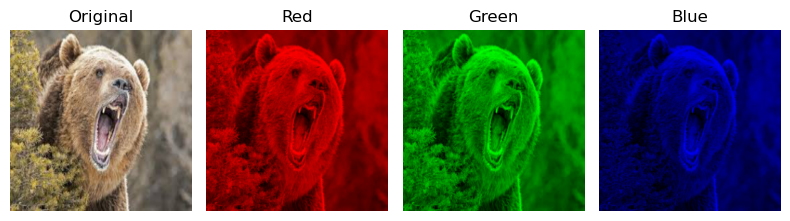

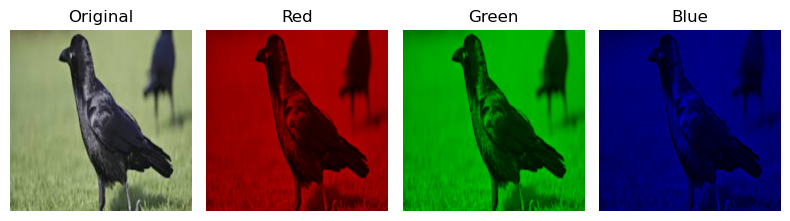

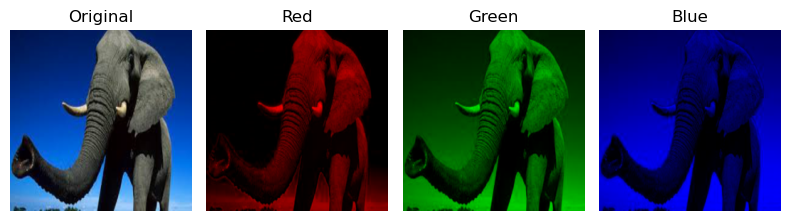

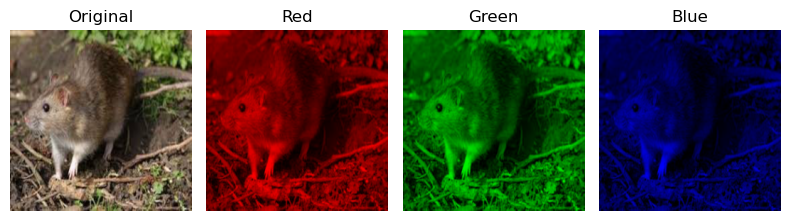

In [20]:
# the following is the position in the training set of the first bear, crow, elephant and rat
starting_indices = [0] + labels_distribution.cumsum().drop(index = label_names[len(labels)-1], axis = 0).tolist() # indices of the images we want to visualize

for index in starting_indices:
    show_image(index, dataset = train_dataset, devs = IMAGENET_STDS, means = IMAGENET_MEANS, size = (8,4))

# CNN architecture

4 output neurons, for 4 classes:

In [ ]:
n = RESIZE_DIM  # n = 32, dimensione dell'immagine in input

class my_net(nn.Module):
     
    def __init__(self, number_of_classes):
        super().__init__()
        ks_conv = 5
        s_conv = 1
        p_conv = 1
        ks_pool = 2
        s_pool = 2
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=ks_conv, stride=s_conv, padding=p_conv)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=ks_conv, stride=s_conv, padding=p_conv)
        self.bn2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=ks_conv, stride=s_conv, padding=p_conv)
        self.bn3 = nn.BatchNorm2d(16)

        self.activation = nn.ReLU()
        self.pooling = nn.MaxPool2d(kernel_size=ks_pool, stride=s_pool)
        self.dropout = nn.Dropout(p = 0.2)
        
        self.flatten = nn.Flatten(1,3)
        self.fc1 = nn.Linear(((((n-2)//2-2)//2-2)//2)**2 *16, 16)
        self.fc2 = nn.Linear(16, number_of_classes) # 4 classes for crows, rats, bears, elephants

        # do not put the softmax!

    def forward(self, x):
        # Input shape: (batch_size, 3, n, n)
        x = self.activation(self.bn1(self.conv1(x)))  # -> (batch_size, 16, n-2, n-2)
        x = self.pooling(x)  # -> (batch_size,16, (n-2)//2, (n-2)//2)
        x = self.dropout(x)

        x = self.activation(self.bn2(self.conv2(x)))  # -> (batch_size, 16, (n-2)//2-2, (n-2)//2-2)
        x = self.pooling(x) # -> (batch_size, 16, ((n-2)//2-2)//2, ((n-2)//2-2)//2)
        x = self.dropout(x)

        x = self.activation(self.bn3(self.conv3(x)))  # -> (batch_size, 16 , ((n-2)//2-2)//2-2, ((n-2)//2-2)//2-2)
        x = self.pooling(x) # -> (batch_size, 16, (((n-2)//2-2)//2-2)//2, (((n-2)//2-2)//2-2)//2)
        x = self.dropout(x)

        x = self.flatten(x)  # -> (batch_size, ((((n-2)//2-2)//2-2)//2)**2 *16)

        x = self.activation(self.fc1(x))  # -> (batch_size, 16)
        x = self.dropout(x)

        x = self.fc2(x)  # -> (batch_size, 4)
        return x

# Instantiating the model
model = my_net(number_of_classes = 4).to(device)

summary(model, input_size = (3, n, n), batch_size = BATCH_SIZE)



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 16, 254, 254]           1,216
       BatchNorm2d-2         [32, 16, 254, 254]              32
              ReLU-3         [32, 16, 254, 254]               0
         MaxPool2d-4         [32, 16, 127, 127]               0
           Dropout-5         [32, 16, 127, 127]               0
            Conv2d-6         [32, 16, 125, 125]           6,416
       BatchNorm2d-7         [32, 16, 125, 125]              32
              ReLU-8         [32, 16, 125, 125]               0
         MaxPool2d-9           [32, 16, 62, 62]               0
          Dropout-10           [32, 16, 62, 62]               0
           Conv2d-11           [32, 16, 60, 60]           6,416
      BatchNorm2d-12           [32, 16, 60, 60]              32
             ReLU-13           [32, 16, 60, 60]               0
        MaxPool2d-14           [32, 16,

# Metric of performance : accuracy

The following is correct for a general number of classes:

In [22]:
# THIS IS TO SHOW THE DIFFERENCE BETWEEN A CORRECT AND AN UNCORRECT VERSION OF accuracy_on_loader

# def accuracy_on_loader(model, loader):
#     correct = 0.0
#     model.eval()
#     with torch.no_grad():
#         for x, y in loader:
#             x = x.to(device)
#             y = y.to(device)
#             out_vector = model(x)  # Shape: (BATCH_SIZE, number_of_classes)
#             y_hat = torch.argmax(out_vector, dim = 1)  # Predicted class index
#             correct += (y_hat == y).sum().item() 
        
#     accuracy = correct / len(loader.dataset) * 100 # THIS IS NOT ALWAYS CORRECT
#     return accuracy

def accuracy_on_loader(model, loader):
    correct = 0.0
    total = 0
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            out_vector = model(x) # Shape: (BATCH_SIZE, number_of_classes)
            y_hat = torch.argmax(out_vector, dim = 1) # Predicted class index
            correct += (y_hat == y).sum().item()
            total += y.size(0) # this is needed if we drop the last batch!

    accuracy = correct / total * 100
    return accuracy


# accuracy_on_loader(model, train_loader)

The following is totally equivalent, but using `accuracy_score` of scikit-learn:

In [23]:
# def accuracy_on_loader(model, loader):
#     model.eval()
#     y_true_all = []
#     y_hat_all = []
    
#     with torch.no_grad():
#         for x, y in loader:
#             x, y = x.to(device), y.to(device)
#             y_hat = torch.argmax(model(x), dim=1)

#             y_true_all.extend(y.cpu().numpy().tolist())
#             y_hat_all.extend(y_hat.cpu().numpy().tolist())
    
#     acc = accuracy_score(y_true_all, y_hat_all) * 100
#     return acc


# accuracy_on_loader(model, train_loader)

# Train the model 

The command `model.load_state_dict(torch.load('animal_dataset/.checkpoints/model_checkpoint.pt'))`, which must be put out of the training (and evaluation) cycle, fixes the parameters of the model to their best value. If this command is not present, after the cycle the parameters are the ones of the last epoch, but not the ones at which the early stopping has appeared!

In [24]:
EPOCHS = 3
LEARNING_RATE = 0.01

In [25]:
best_model_path = f"animal_dataset/.checkpoints/model_checkpoint_best_{LEARNING_RATE}.pt"
last_model_path = f"animal_dataset/.checkpoints/model_checkpoint_last_{LEARNING_RATE}.pt"

model = my_net(number_of_classes = 4).to(device) 
loss_function = nn.CrossEntropyLoss() # non-binary cross-entropy estimator, we will minimize this during the (stochastic) gradient descent
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE) 
early_stopping = EarlyStopping(patience = 4, delta = 0, verbose = True, 
                               path = best_model_path)

train_losses, train_accuracies, test_losses, test_accuracies = train_function(train_loader, 
                                                                             test_loader, 
                                                                             model, 
                                                                             loss_function, optimizer, 
                                                                             path = last_model_path,
                                                                             early_stopping = early_stopping, 
                                                                             epochs = EPOCHS)

  0%|          | 0/3 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------------------------------------------------------------------
									 AT EPOCH 1
Train accuracy: 31.743% --------------  Test accuracy: 29.688%.
Train loss: 3.773 --------------  Test loss: 0.365.
----------------------------------------------------------------------------------------------------------------------------------------------------------------
									 AT EPOCH 2
Train accuracy: 32.072% --------------  Test accuracy: 29.688%.
Train loss: 1.364 --------------  Test loss: 0.364.
----------------------------------------------------------------------------------------------------------------------------------------------------------------
									 AT EPOCH 3
Train accuracy: 31.743% --------------  Test accuracy: 29.688%.
Train loss: 1.362 --------------  Test loss: 0.364.
Epochs without improvement: 1


We load the best model:

In [26]:
if early_stopping.early_stop == True:
    model.load_state_dict(torch.load(best_model_path))
else:
    model.load_state_dict(torch.load(last_model_path))

The code below gives the best accuracies etc. These are the ones of the last epoch if the early stopping is not triggered, and the early stopping ones if it has been triggered:

In [27]:
# if early_stopping == True: # load best model if early stop is triggered
#     model.load_state_dict(torch.load(f"animal_dataset/.checkpoints/model_checkpoint_{LEARNING_RATE}.pt"))

# best_train_acc = accuracy_on_loader(model, train_loader)
# best_test_acc = accuracy_on_loader(model, test_loader)

# model.eval()
# with torch.no_grad():
#     train_loss_total = 0.0
#     for x_train, y_train in train_loader:
#         x_train, y_train = x_train.to(device), y_train.to(device)
#         y_hat_train = model(x_train)
#         loss = loss_function(y_hat_train, y_train)
#         train_loss_total += loss.item()
#     best_train_loss = train_loss_total / len(train_loader)

#     test_loss_total = 0.0
#     for x_test, y_test in test_loader:
#         x_test, y_test = x_test.to(device), y_test.to(device)
#         y_hat_test = model(x_train)
#         loss = loss_function(y_hat_test, y_test)
#         test_loss_total += loss.item()
#     best_test_loss = test_loss_total / len(test_loader)

# print(f"Best train accuracy: {best_train_acc}%")
# print(f"Best val accuracy: {best_test_acc}%")
# print(f"Lowest train loss: {best_train_loss}")
# print(f"Lowest val loss: {best_test_loss}")

In [28]:
early_stop_plot(train_losses, train_accuracies, test_losses, test_accuracies, early_stopping)

Early stopping not triggered, plot not showed.


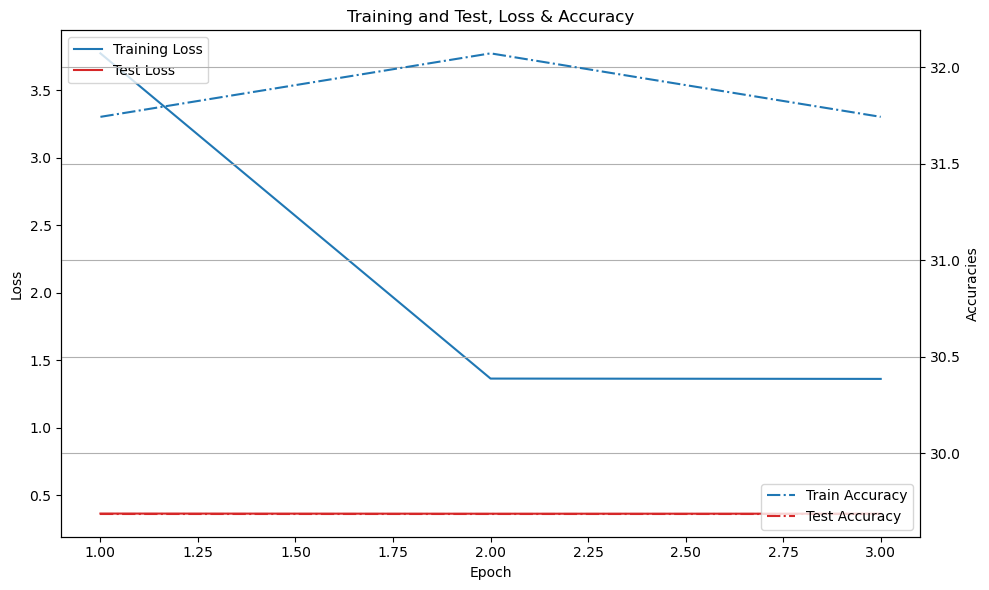

In [29]:
training_results(train_losses, train_accuracies, test_losses, test_accuracies, epochs = EPOCHS)

# Parameter fine tuning (not completely done)

We want now to evaluate the model performances for different values of the hyperparameters (only le learning rate in this case.) We repeat everything as before basically, but we have to save the configurations of parameters for each value of learning rate, so that at the end we can use **model.load_state_dict(torch.load('animal_dataset/.checkpoints/model_checkpoint_{learning_rate}.pt'))** to use the best model later on!

In [ ]:
# loss_function = nn.CrossEntropyLoss()

# def par_tuning(lrs,EPOCHS):
#     train_losses = []
#     train_accuracies = []
#     val_losses = []
#     val_accuracies = []
#     results = []
#     for learning_rate in lrs:
#         print("Learning rate:", learning_rate)
#         model = my_net().to(device) 
#         optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate) 
#         early_stopping = EarlyStopping(patience=4, verbose=False, path=f'animal_dataset/.checkpoints/model_checkpoint_{learning_rate}.pt')
#         for epoch in range(EPOCHS):
#             model.train() # Set the model to training mode
#             train_loss = 0.0
    
#             for x_train, y_train in train_loader: #for each epoch, we do the backpropagation etc for each batch
#                 x_train = x_train.to(device)  # Move input to the device
#                 y_train = y_train.to(device)  # Move target to the device
#                 yhat = model(x_train) #the model returns a tensor of shape (batch_size,1), we squeeze it to have a tensor of shape (batch_size,)
#                 loss = loss_function(yhat, y_train)
#                 optimizer.zero_grad()
#                 loss.backward()
#                 optimizer.step()
#                 train_loss += loss
  
#             model.eval()
#             with torch.no_grad():
#                 val_loss = 0.0 
#                 for x_val, y_val in val_loader: 
#                     x_val = x_val.to(device)  # Move input to the device
#                     y_val = y_val.to(device)  
#                     out_val = model(x_val) 
#                     loss = loss_function(out_val, y_val).item()
#                     val_loss += loss


#             train_loss /= len(train_loader)   # we divide by the number of batches
#             val_loss /= len(val_loader)  
#             early_stopping(val_metric=val_loss, model=model) # Check if we should stop training early
#             train_losses.append(train_loss.detach().cpu())
#             val_losses.append(val_loss)

#             train_acc, val_acc = accuracy_of_model(model, train_loader, val_loader)
#             train_accuracies.append(train_acc)
#             val_accuracies.append(val_acc)


#             if early_stopping.early_stop:
#                     print("Early stopping triggered.")
#                     break
  
  
  
#         model.load_state_dict(torch.load(f'animal_dataset/.checkpoints/model_checkpoint_{learning_rate}.pt'))
 

#         print(f"The best accuracy on the train set is {train_accuracies[-1]:.2f}%")
#         print(f"The best accuracy on the val set is {val_accuracies[-1]:.2f}%")
#         print('The lowest loss on the train set is',train_losses[-1].item())
#         print('The lowest loss on the val set is',val_losses[-1])
            
#         results.append([train_loss.item(), val_loss, train_acc, val_acc])
        

#     return results

# lrs = [0.01, 0.02]
# results = par_tuning(lrs, 1)



Learning rate: 0.01
The best accuracy on the train set is 31.34%
The best accuracy on the val set is 29.14%
The lowest loss on the train set is 3.311040163040161
The lowest loss on the val set is 1.3782620310783387
Learning rate: 0.02
The best accuracy on the train set is 29.00%
The best accuracy on the val set is 26.38%
The lowest loss on the train set is 3.7577621936798096
The lowest loss on the val set is 1.3804624438285829


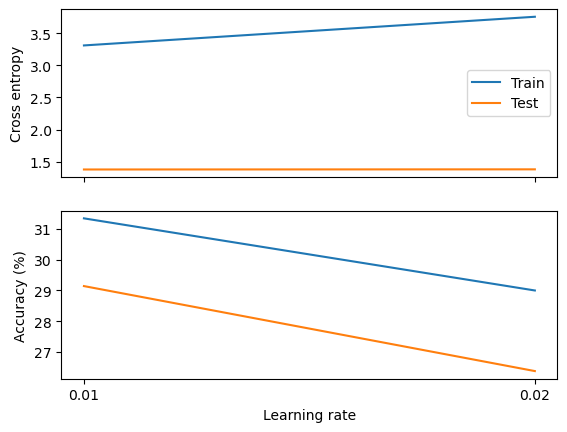

In [ ]:
# results = np.array(results).T
# fig, ax = plt.subplots(nrows=2, ncols=1, sharex = True)
# ax[0].plot(lrs, results[0], label = "Train")
# ax[0].plot(lrs, results[1], label = "Test")
# ax[0].legend()
# ax[0].set_ylabel("Cross entropy")
# ax[1].plot(lrs, results[2], label = "Train")
# ax[1].plot(lrs, results[3], label = "Test")
# ax[1].set_xlabel("Learning rate")
# ax[1].set_ylabel("Accuracy (%)")
# ax[1].set_xticks(lrs)
# plt.show()
# plt.close()

Now we can load the best model:

In [41]:
best_lr = lrs[np.argmin(results[1])]
model.load_state_dict(torch.load(f'animal_dataset/.checkpoints/model_checkpoint_{best_lr}.pt'))

<All keys matched successfully>

# Model interpretation

## Confusion matrix

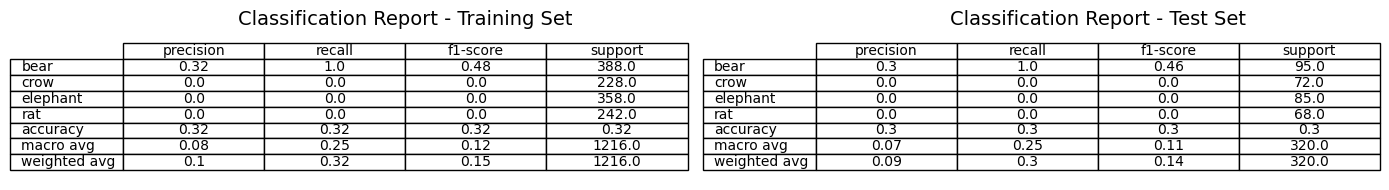

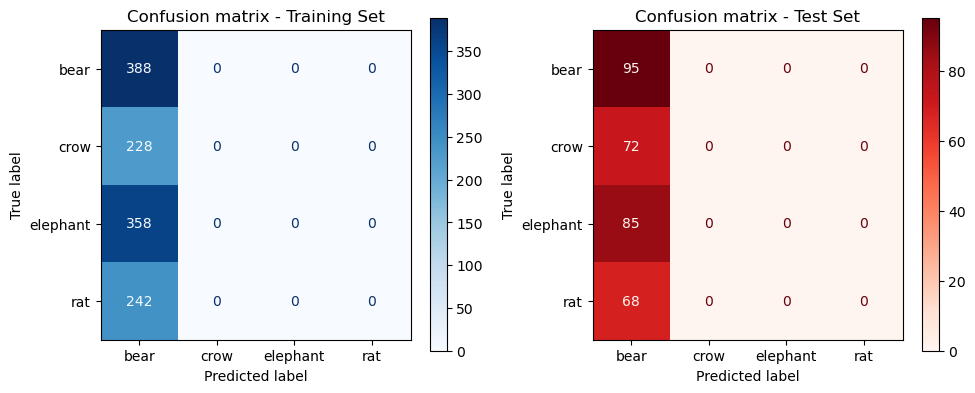

In [ ]:
classification_reports(train_loader, test_loader, model, labels, classes, size = (10, 4))

## Saliency map

Another tool we can use are **saliency maps**, that provide visual explanations of the model's decision-making process by highlighting the regions of the input image that are most influential in predicting a particular class:

$(SM)_{ijk} = \dfrac{\partial y_{predicted}}{\partial x_{ijk}} $

$ i \in \{1,\dots,n_{\text{channels}}\}$

$ j \in \{1,\dots, W_{\text{idth}}\}$

$ k \in \{1,\dots, H_{\text{eight}}\}$

In [31]:
def generate_saliency_map(model, image):

    model.eval()

    saliency_map = []

    for i in range(image.size(0)):

      x = copy.copy(image[i:i+1])  # we create a copy of the image
      x = x.to(device)
      x.requires_grad = True

      output = model(x).squeeze()

      _, target_class = torch.max(output, -1) # we get the predict class (similar to argmax)

      model.zero_grad()
      output[target_class].backward()

      gradients = x.grad

      map, _ = torch.max(gradients.abs().squeeze(), dim=0) # we get the maximum across channels

      saliency_map.append(map.cpu().detach().numpy())
      saliency_map[i] = (saliency_map[i]- saliency_map[i].min())/(saliency_map[i].max() - saliency_map[i].min())  # we scale saliency map in range [0,1]
      x.requires_grad = False

    return np.array(saliency_map)

/var/folders/35/gw8dmgsd6m11bg8nhrgpd3vr0000gn/T/ipykernel_17273/3316313207.py:25: RuntimeWarning: invalid value encountered in divide
  saliency_map[i] = (saliency_map[i]- saliency_map[i].min())/(saliency_map[i].max() - saliency_map[i].min())  # we scale saliency map in range [0,1]


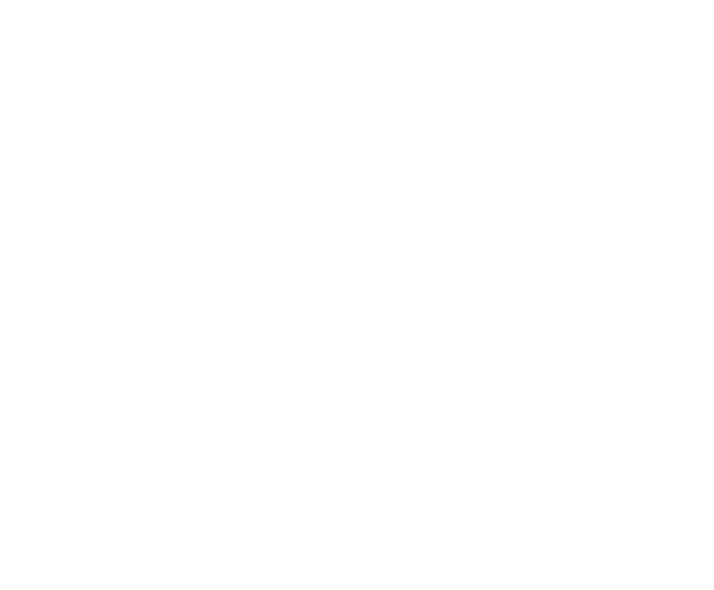

In [34]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
saliency_map = generate_saliency_map(model, example_data)
num_rows = 4
num_cols = 4

colormap = cm["hot"] #select a cm=colormap

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))

for i in range(num_rows):
  for j in range(num_cols):

    img = ((example_data[4*i + j].swapaxes(0,1).swapaxes(1,2)*0.5 + 0.5)* 255).detach().numpy().astype(np.uint8)
    sm = colormap(saliency_map[4*i + j]) # Apply colormap to saliency map

    axes[i, j].imshow(transforms.ToPILImage()(sm))

    axes[i,j].axis('off')

plt.tight_layout()
plt.show()
plt.close()

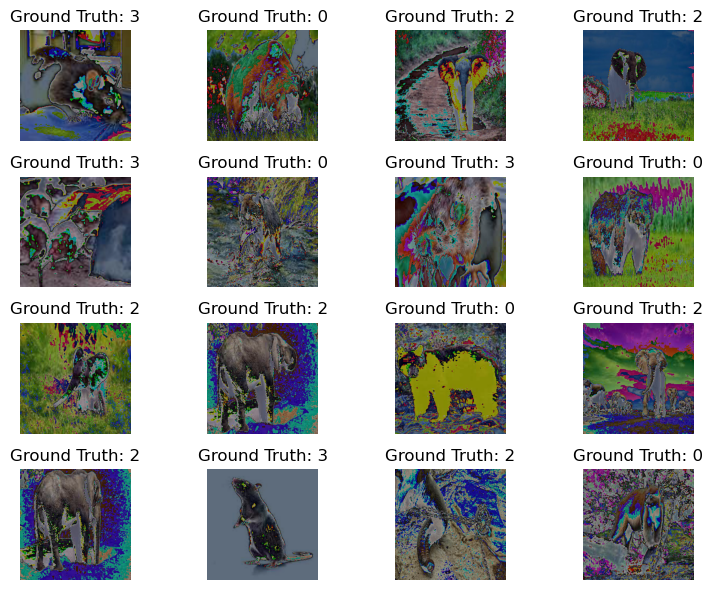

In [33]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))

for i in range(num_rows):
  for j in range(num_cols):

    img = ((example_data[4*i + j].swapaxes(0,1).swapaxes(1,2)*0.5 + 0.5)* 255).detach().numpy().astype(np.uint8)
    sm = colormap(saliency_map[4*i + j])[:, :, :3]  # Apply colormap to saliency map

    axes[i, j].imshow(Image.blend(Image.fromarray(img), transforms.ToPILImage()(sm), alpha = 0.4))


    axes[i, j].set_title("Ground Truth: {}".format(example_targets[4*i + j]))

    axes[i,j].axis('off')

plt.tight_layout()
plt.show()